# HeLa Cells Image Processing
This notebook is designed to process an image of HeLa cells (`hela-cells-8bit.tif`). The image is a composite containing different color channels: blue, green, and red. Our objective is to segment the objects in the blue channel, which typically represents the nuclei of the cells.

We'll be using the `skimage` (scikit-image) library and `matplotlib` for image processing and plotting.

### Import necessary libraries
First, we need to import the libraries that will help us load the image, process it, and display the results.

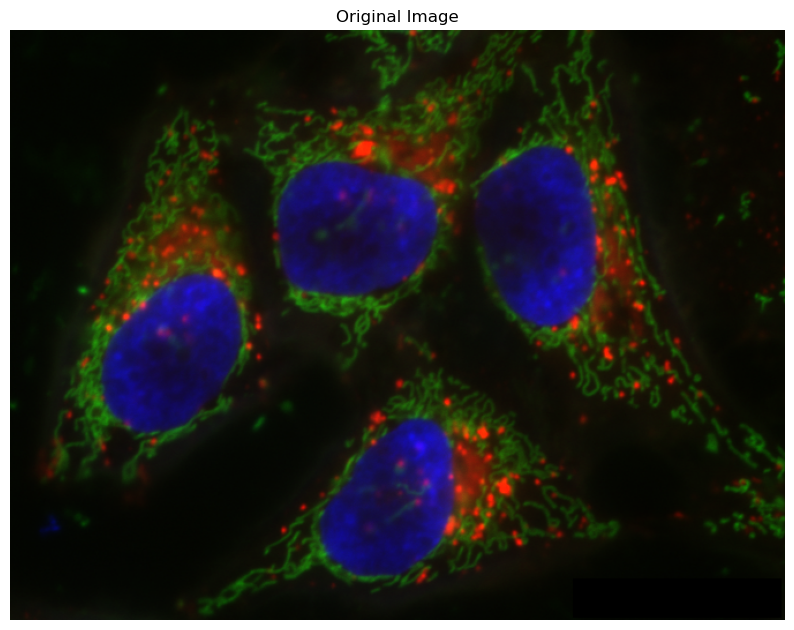

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, measure, morphology, color

# Set a figure size
plt.rcParams['figure.figsize'] = [10, 8]

# Read the image
image = io.imread('hela-cells-8bit.tif')

# Display the original image
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

### Extract the blue channel
In the composite image, the blue channel typically represents the nuclei of the cells. We will extract this channel for segmentation.

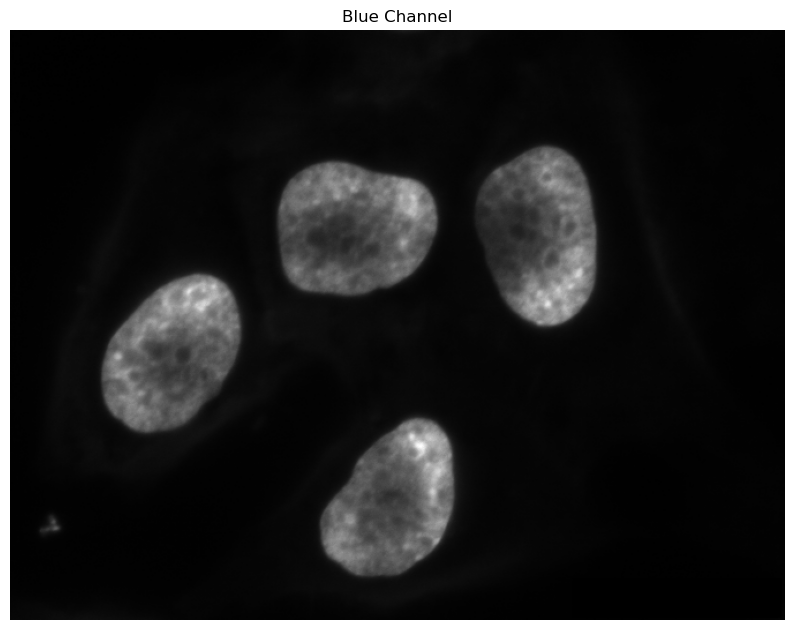

In [2]:
# Extract the blue channel
blue_channel = image[:, :, 2]

# Display the blue channel
plt.imshow(blue_channel, cmap='gray')
plt.title('Blue Channel')
plt.axis('off')
plt.show()

### Apply Gaussian filter
We'll apply a Gaussian filter to smooth the image and reduce noise. This helps in obtaining better segmentation results.

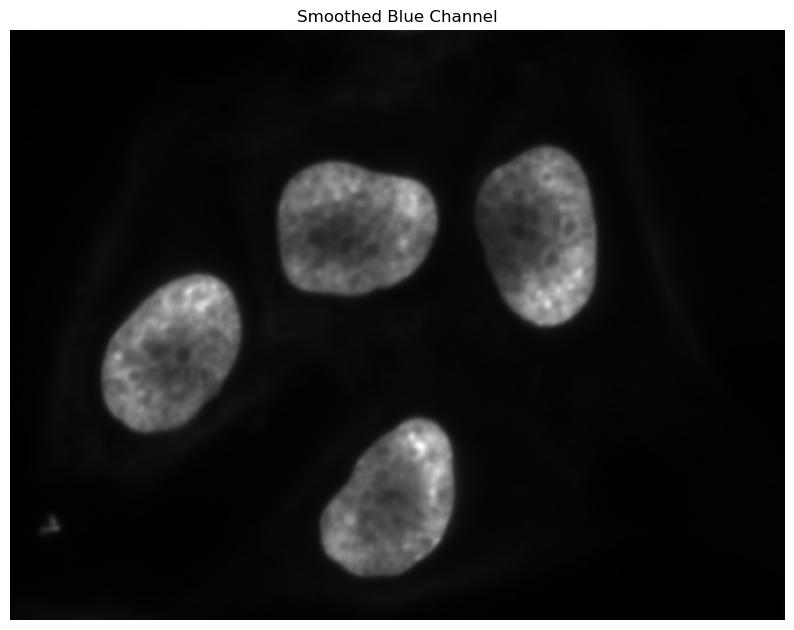

In [3]:
# Apply Gaussian filter
blue_channel_smooth = filters.gaussian(blue_channel, sigma=1)

# Display the smoothed blue channel
plt.imshow(blue_channel_smooth, cmap='gray')
plt.title('Smoothed Blue Channel')
plt.axis('off')
plt.show()

### Thresholding
We need to convert the grayscale image into a binary image. We will use Otsu's thresholding method for this purpose, which automatically determines the optimal threshold value.

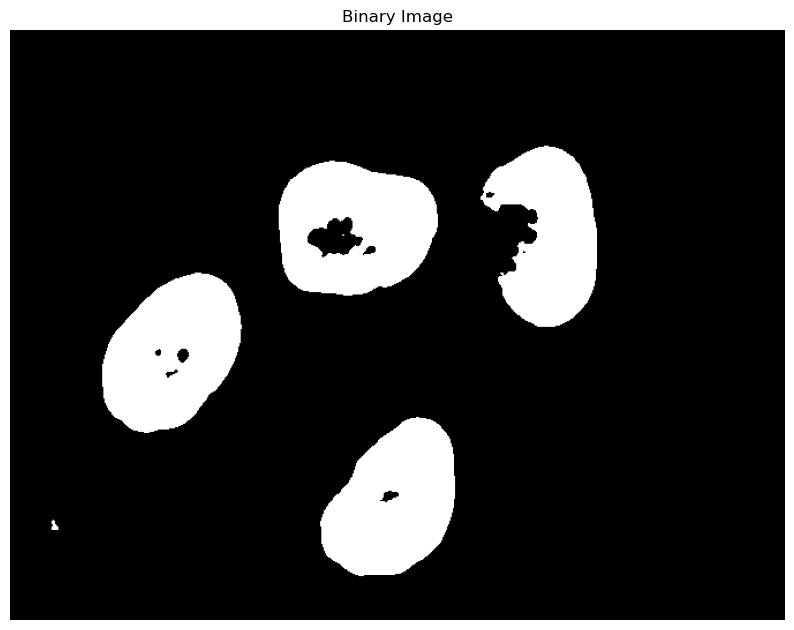

In [4]:
# Apply Otsu's thresholding
threshold_value = filters.threshold_otsu(blue_channel_smooth)
binary_image = blue_channel_smooth > threshold_value

# Display the binary image
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()

### Morphological operations
We'll use morphological operations to clean up the binary image. Operations like removing small objects and closing small holes will be used.

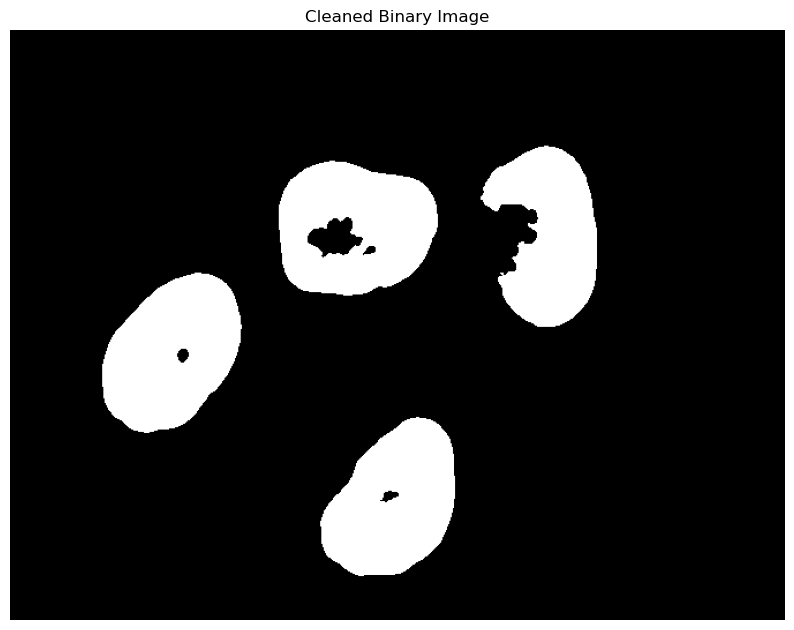

In [5]:
# Remove small objects and close small holes
cleaned_binary_image = morphology.remove_small_objects(binary_image, min_size=50)
cleaned_binary_image = morphology.remove_small_holes(cleaned_binary_image, area_threshold=50)

# Display the cleaned binary image
plt.imshow(cleaned_binary_image, cmap='gray')
plt.title('Cleaned Binary Image')
plt.axis('off')
plt.show()

### Label connected components
Next, we will label the connected components in the cleaned binary image. Each connected component corresponds to a distinct nucleus.

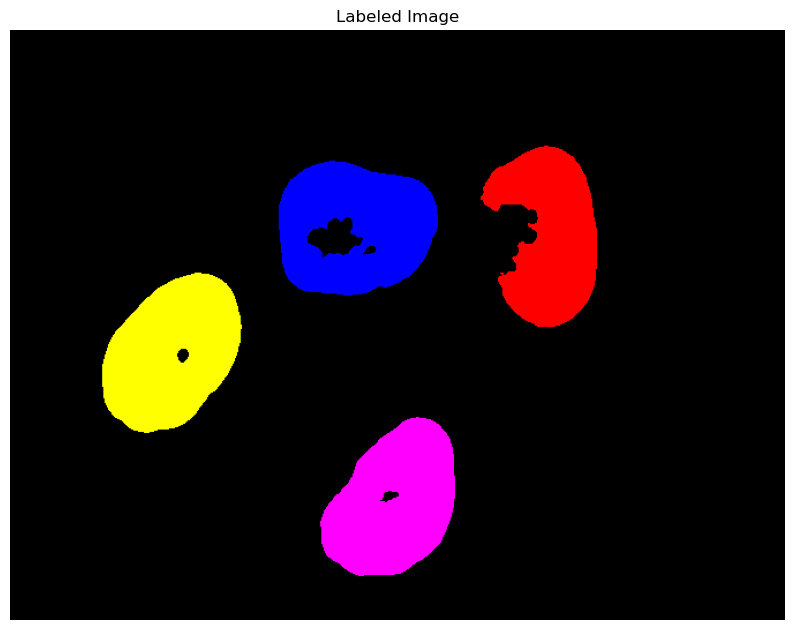

In [6]:
# Label connected components
label_image = measure.label(cleaned_binary_image)

# Display the labeled image with color
plt.imshow(color.label2rgb(label_image, bg_label=0))
plt.title('Labeled Image')
plt.axis('off')
plt.show()

### Count the number of nuclei
Finally, we can count the number of labeled nuclei in our image.

In [7]:
# Count the number of nuclei
num_nuclei = label_image.max()
print(f"Number of nuclei: {num_nuclei}")

Number of nuclei: 4


### Summary
In this notebook, we have segmented the objects in the blue channel of the HeLa cells image. The steps included loading the image, extracting the blue channel, smoothing the image, applying thresholding, cleaning up the binary image with morphological operations, labeling the connected components, and finally counting the number of nuclei.

This segmentation could be further refined by adjusting the parameters or applying more advanced techniques depending on the specific requirements.